In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("D:\MSIS\FML Lab\Part 2\Dataset\house_price.csv")

In [3]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012.92,32.0,84.88,10.0,24.98,121.54,37.9
1,2.0,2012.92,19.5,306.59,9.0,24.98,121.54,42.2
2,3.0,2013.58,13.3,561.98,5.0,24.99,121.54,47.3
3,4.0,2013.50,13.3,561.98,5.0,24.99,121.54,54.8
4,5.0,2012.83,5.0,390.57,5.0,24.98,121.54,43.1
...,...,...,...,...,...,...,...,...
409,410.0,2013.00,13.7,4082.02,0.0,24.94,121.50,15.4
410,411.0,2012.67,5.6,90.46,9.0,24.97,121.54,50.0
411,412.0,2013.25,18.8,390.97,7.0,24.98,121.54,40.6
412,413.0,2013.00,8.1,104.81,5.0,24.97,121.54,52.5


In [4]:
#Check NULL values
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
#Selecting Features
X=data.iloc[:,1:7].values
y=data.iloc[:,7].values

In [6]:
#Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [8]:
#Applying PCA with n_components=1
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.44074545])

In [9]:
#Implement LinearRegression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=regressor.predict(X_test)

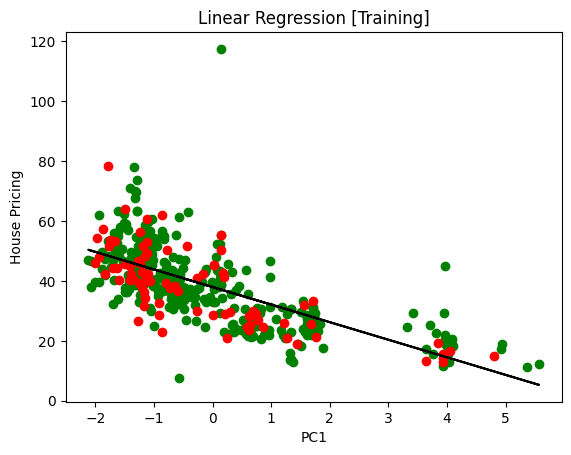

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color='green')
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='black')
plt.title('Linear Regression [Training]')
plt.xlabel('PC1')
plt.ylabel('House Pricing')
plt.show()

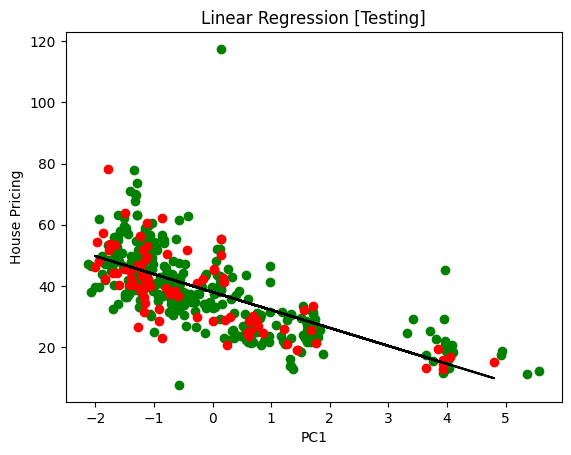

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color='green')
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='black')
plt.title('Linear Regression [Testing]')
plt.xlabel('PC1')
plt.ylabel('House Pricing')
plt.show()